In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns

expenses = pd.read_csv("~/expense/exp")
# conditions = [
#     (expenses['reminder'].str.find("precalculate") != -1)
   
#     ]
# values=[(expenses.loc[expenses.index]['reminder'].str.split('-')[1])]
# # expenses["cat1"]=np.select(conditions,values)
# expenses["cat1"]=np.where(expenses['reminder'].str.find('precalculate')!=-1,expenses['reminder'].str.)

def defCat(x):
    y=x.split('-')
    firstCat=y[0]
    if firstCat=='precalculate':
        return y[1]
    else :
        return y[0]

def defCat2(x):
    y=x.split('-')
    firstCat=y[0]
    if firstCat=='precalculate':
        try:
            return y[2]
        except IndexError:
            return y[1]
    else :
        try:
            return y[1]
        except IndexError:
            return y[0]

     

# expenses['cat1']=expenses['reminder'].apply(defCat)
# expenses['cat2']=expenses['reminder'].apply(defCat2)
#vectorize
# df['new'] = df['c'] * df['d'] #default case e = =10
# mask = df['e'] < 10
# df.loc[mask,'new'] = df['c'] + df['d']
# mask = df['e'] < 5
# df.loc[mask,'new'] = df['a'] + df['b']

# expenses
minum = ['galon','air','aqua']
bvg = ['bvg','frestea','cola','kopi','teh','tea']
makan = ['makan','lauk','jambu','kelapa','kerupuk','egg','buah','telur','quaker']
ff = ['juice','jus','energen','ff','pia','kue','roti','gorengan','molen','ketchup','soy','kecap','bread']
transaction = ['topup','transfer','fees','feesible']
utility = ['bottle','kos','netflix','internet','giganet','zoom','cukur','kuota','gelas','battery','baterai']
transport = ['mrt','busway','angkot','kereta','damri','krl']
health=['listerine','kalpanax','rinso','sabun','masker','odol']

def check2(x,y):
    if any(xx in x for xx in y):
        return True
    else :
        return False

def splitter(x):
    x = expenses.loc[x]['reminder'].split('-')
    
#     print(x)
    if check2(x,minum) :
        return "minum"
    elif check2(x, bvg ):
        return "bvg"
    elif check2(x, makan):
        return "makan"
    elif check2(x, ff):
        return "ff"
    elif check2(x,transaction):
        return "fees"
    elif check2(x,utility):
        return "utility"
    elif check2(x,transport):
        return "transport"
    elif check2(x,health):
        return "health"
    else :
        return "unknown"

grouped = expenses.groupby(splitter)

# grouped.describe()
# for m, n in grouped:
#    print (m)
#    print (n)

# expenses.describe()


<AxesSubplot:title={'center':'expenses'}>

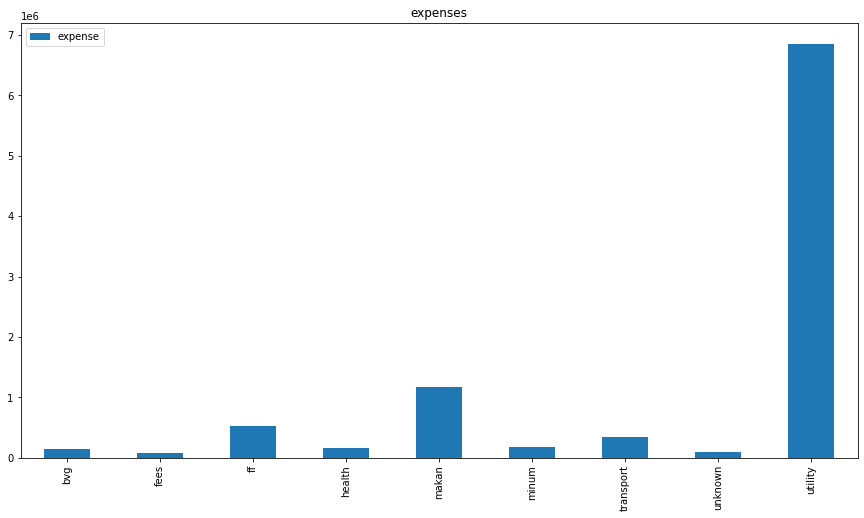

In [2]:
gg=grouped.sum()
gg.plot(kind="bar",title="expenses",figsize=(15,8))

<AxesSubplot:title={'center':'expenses without utility'}>

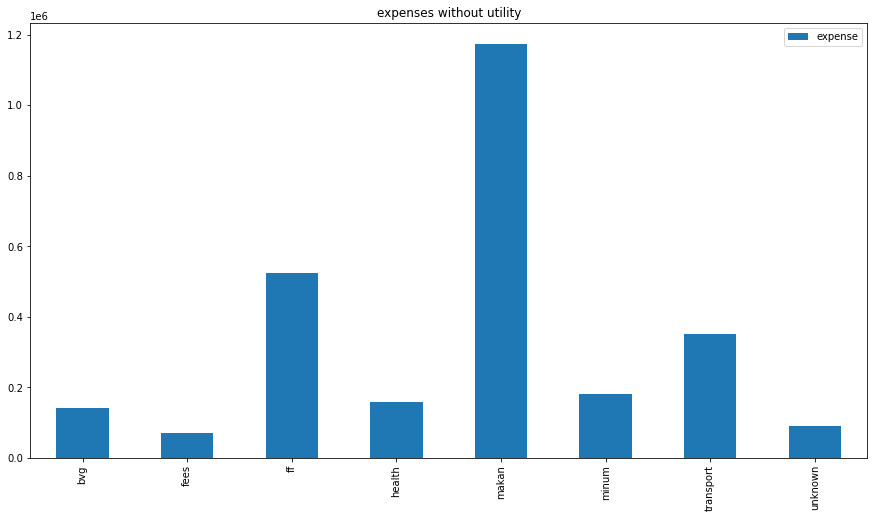

In [3]:
gg.drop(index='utility').plot(kind="bar",title="expenses without utility",figsize=(15,8))


In [4]:
profile = ProfileReport(expenses, title="Expenses")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]